In [5]:
# !pip install tensorflow==2.9.1

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:09
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.0 MB/s eta 0:00:002.2 MB/s eta 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 KB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers

In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [213]:
# Function to read and preprocess data from a directory
def read_and_preprocess_old_mfcc(directory):
    class_data = []
    labels = []

    for class_label, class_name in enumerate(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            df = pd.read_csv(file_path)
            # df = df.iloc[:, :20]
            # print("df shape: ", df.shape)
            # df = df.mean()
            # print("df mean shape: ", df.shape)
            # print(df)
            # Assuming each CSV file contains a 20x129 2D array
            class_data.append(df.values)
            labels.append(class_name)

    return np.array(class_data), np.array(labels), df.shape

In [15]:
def cnn_model(classes_num):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(499, 40)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model

In [16]:
from tensorflow.keras.layers import BatchNormalization, Dropout
import tensorflow as tf

In [17]:
import matplotlib.pyplot as plt

In [18]:
def complex_cnn_model(classes_num, input_shape=(499, 20)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model

In [56]:
def complex_cnn_model_2(classes_num, input_shape=(499, 20)):

    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax')) 
    return model

In [282]:
def complex_cnn_model_3(classes_num, input_shape=(499, 20)):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(7, activation='softmax'))
    return model

In [283]:
def cnn_model(classes_num, input_shape=(40, 1)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=8))

    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=2))


    model.add(Flatten())
    # model.add(Dense(64, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model



In [284]:
def cnn_model(classes_num, input_shape=(40, 1)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))

    # model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(MaxPooling1D(pool_size=2))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(classes_num, activation='softmax'))
    return model



# 1D with SVM

In [573]:
from sklearn.svm import SVC

# Create the SVM classifier
svm_classifier = SVC()

# Evaluate the classifier
training_directory = "3-old_mfccs_revisited/preprocessed/training"
X_train, y_train, _ = read_and_preprocess_old_mfcc(training_directory)


# Shuffle X_train and y_train
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

svm_X_train = []
for example in X_train:
    # print(example.shape)
    svm_X_train.append(example.mean(axis=1))
svm_X_train = np.array(svm_X_train)
svm_X_train.shape

# Train the classifier
svm_classifier.fit(svm_X_train, y_train)


SVC()

In [574]:
# Evaluate the classifier
testing_directory = "3-old_mfccs_revisited/preprocessed//testing"
X_test, y_test, _ = read_and_preprocess_old_mfcc(testing_directory)

svm_X_test = []
for example in X_test:
    # print(example.shape)
    svm_X_test.append(example.mean(axis=1))
svm_X_test = np.array(svm_X_test)
print(svm_X_test.shape)

# Convert lists to numpy arrays
y_test = np.array(y_test)

accuracy = svm_classifier.score(svm_X_test, y_test)
print("Accuracy:", accuracy)
orig_predictions = svm_classifier.predict(svm_X_test)
orig_predictions

(101, 22)
Accuracy: 0.6039603960396039


array(['S', 'A', 'A', 'S', 'S', 'A', 'S', 'S', 'A', 'A', 'A', 'A', 'O',
       'O', 'S', 'O', 'O', 'O', 'O', 'S', 'O', 'O', 'O', 'O', 'S', 'S',
       'L', 'Renad', 'L', 'L', 'Renad', 'L', 'Renad', 'L', 'Renad', 'L',
       'S', 'L', 'Y', 'Y', 'Y', 'A', 'S', 'S', 'Y', 'Y', 'Y', 'Y', 'S',
       'S', 'S', 'L', 'S', 'Renad', 'A', 'S', 'S', 'Renad', 'S', 'S', 'S',
       'L', 'S', 'S', 'Renad', 'Renad', 'Reem', 'Reem', 'Renad', 'Renad',
       'Renad', 'Reem', 'Renad', 'Reem', 'Renad', 'Renad', 'Renad', 'L',
       'Renad', 'Renad', 'L', 'Renad', 'L', 'Renad', 'Renad', 'Renad',
       'L', 'Renad', 'Renad', 'S', 'Renad', 'S', 'Renad', 'Renad', 'L',
       'Renad', 'Renad', 'Renad', 'Renad', 'Renad', 'Renad'], dtype='<U5')

In [575]:
# Evaluate the classifier
testing_directory = "3-old_mfccs_revisited (copy)/preprocessed/testing"
X_test, y_test, _ = read_and_preprocess_old_mfcc(testing_directory)

svm_X_test = []
for example in X_test:
    # print(example.shape)
    svm_X_test.append(example.mean(axis=1))
svm_X_test = np.array(svm_X_test)
print(svm_X_test.shape)

# Convert lists to numpy arrays
y_test = np.array(y_test)


accuracy = svm_classifier.score(svm_X_test, y_test)
print("Accuracy:", accuracy)
new_predictions = svm_classifier.predict(svm_X_test)
new_predictions

(99, 22)
Accuracy: 0.5656565656565656


array(['S', 'A', 'A', 'S', 'S', 'A', 'S', 'S', 'A', 'A', 'A', 'A', 'O',
       'O', 'S', 'O', 'O', 'O', 'O', 'S', 'O', 'O', 'O', 'O', 'S', 'S',
       'L', 'Renad', 'L', 'L', 'Renad', 'L', 'Renad', 'L', 'Renad', 'L',
       'S', 'L', 'Y', 'Y', 'Y', 'A', 'S', 'S', 'Y', 'Y', 'Y', 'Y', 'S',
       'S', 'L', 'S', 'Renad', 'S', 'Renad', 'Renad', 'L', 'Renad', 'S',
       'S', 'Renad', 'L', 'Renad', 'Renad', 'Reem', 'Reem', 'Renad',
       'Renad', 'Renad', 'Reem', 'Renad', 'Reem', 'Renad', 'Renad',
       'Renad', 'L', 'Renad', 'Renad', 'L', 'Renad', 'L', 'Renad',
       'Renad', 'Renad', 'L', 'Renad', 'Renad', 'S', 'Renad', 'S',
       'Renad', 'Renad', 'L', 'Renad', 'Renad', 'Renad', 'Renad', 'Renad',
       'Renad'], dtype='<U5')

In [576]:
count = 0
original_trues = 0
for i in range(len(X_test)):
    if y_test[i] == 'S' and orig_predictions[i] == 'S':
        original_trues += 1
        if orig_predictions[i] == new_predictions[i]:
            # print("Actual:", actual_class_names[i], "Orig:", orig_predicted_class_names[i], "New: ", new_predicted_class_names[i])
            count += 1
print(f"True different device: {count} out of 12")
print(f"True same device: {original_trues} out of 12")

True different device: 2 out of 12
True same device: 7 out of 12


# 1D with CNN

In [865]:
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_1d_complex(classes_num):
    # Define the CNN model
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(22, 1)))

    # Convolutional layers
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.15))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(7, activation='softmax'))  # Output layer with 7 classes
    return model

In [866]:
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_1d(classes_num):
    # Define the CNN model
    model = models.Sequential()

    # Add the input layer
    model.add(layers.Reshape((22, 1), input_shape=(22,)))

    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Flatten layer to transition from convolutional to dense layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(layers.Dense(7, activation='softmax'))  # Output layer with 7 classes
    return model

In [891]:
# Define the input shape
# Load training data
training_directory = "3-old_mfccs_revisited/preprocessed/training"
classes_num = len(os.listdir(training_directory))
X_train, y_train, df_shape = read_and_preprocess_old_mfcc(training_directory)
print(df_shape)
# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
# One-hot encode labels
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))

# Shuffle X_train and y_train
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

cnn_X_train = []
for example in X_train:
    # print(example.shape)
    cnn_X_train.append(example.mean(axis=1))
cnn_X_train = np.array(cnn_X_train)
cnn_X_train.shape

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(cnn_X_train, y_train, test_size=0.3, random_state=42)


# Create the CNN model
# model = cnn_1d_complex(classes_num)
model = cnn_1d(classes_num)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


(22, 216)
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_31 (Reshape)        (None, 22, 1)             0         
                                                                 
 conv1d_88 (Conv1D)          (None, 20, 32)            128       
                                                                 
 max_pooling1d_86 (MaxPoolin  (None, 10, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_89 (Conv1D)          (None, 8, 64)             6208      
                                                                 
 max_pooling1d_87 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 flatten_81 (Flatten)        (None, 256)   

In [892]:
# Create the CNN model
# model = cnn_model(classes_num)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val))
# model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


13/13 [==============================] - 0s 10ms/step - loss: 13.0176 - accuracy: 0.0816 - val_loss: 3.2584 - val_accuracy: 0.1667
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 4.5449 - accuracy: 0.2245 - val_loss: 1.2204 - val_accuracy: 0.5476
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 2.0111 - accuracy: 0.3163 - val_loss: 1.0126 - val_accuracy: 0.8333
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2112 - accuracy: 0.5000 - val_loss: 0.8632 - val_accuracy: 0.8571
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8830 - accuracy: 0.6633 - val_loss: 0.7344 - val_accuracy: 0.9048
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9078 - accuracy: 0.7347 - val_loss: 0.6326 - val_accuracy: 0.9048
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.7959 - val_loss: 0.5160 - val_accuracy: 0.9524
Epoch 8/100
13/13 [====

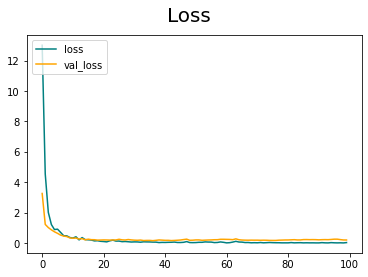

In [893]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

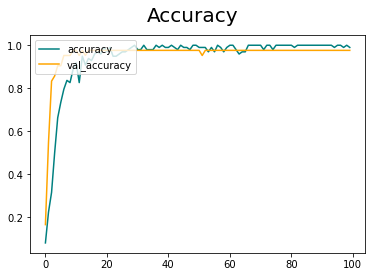

In [894]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [895]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs_revisited/preprocessed/testing"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


cnn_X_test = []
for example in X_test:
    # print(example.shape)
    cnn_X_test.append(example.mean(axis=1))
cnn_X_test = np.array(cnn_X_test)
cnn_X_test.shape


# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(cnn_X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
orig_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", orig_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 932us/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'L' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad'


In [896]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs_revisited (copy)/preprocessed/testing"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


cnn_X_test = []
for example in X_test:
    # print(example.shape)
    cnn_X_test.append(example.mean(axis=1))
cnn_X_test = np.array(cnn_X_test)
cnn_X_test.shape


# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(cnn_X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
new_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", new_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 976us/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'L' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad'


In [897]:
count = 0
original_trues = 0
for i in range(len(X_test)):
    if actual_class_names[i] == 'S' and orig_predicted_class_names[i] == 'S':
        original_trues += 1
        if orig_predicted_class_names[i] == new_predicted_class_names[i]:
            count += 1
    if actual_class_names[i] == 'S':
        print("Actual:", actual_class_names[i], "Orig:", orig_predicted_class_names[i], "New: ", new_predicted_class_names[i])
print(f"True different device: {count} out of 12")
print(f"True same device: {original_trues} out of 12")

Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
Actual: S Orig: S New:  L
True different device: 0 out of 12
True same device: 12 out of 12


In [898]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
import os
import pickle
save_model = False
# Save the label encoder
model_dir = os.path.dirname(training_directory)
model_name = model_dir.split('/')[-1]
with open(model_dir+'/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
if save_model:
    model.save(model_dir+f'/{model_name}_speaker_identifier_cnn_1d.h5')

# 2D with CNN

In [ ]:
# Define the input shape
# Load training data
training_directory = "3-old_mfccs_revisited/preprocessed/training"
classes_num = len(os.listdir(training_directory))
X_train, y_train, df_shape = read_and_preprocess_old_mfcc(training_directory)
print(df_shape)
# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
# One-hot encode labels
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))

# Shuffle X_train and y_train
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create the CNN model
model = complex_cnn_model_3(classes_num, df_shape)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


(22, 216)
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 20, 214, 32)       320       
                                                                 
 batch_normalization_148 (Ba  (None, 20, 214, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 10, 107, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_174 (Dropout)       (None, 10, 107, 32)       0         
                                                                 
 conv2d_114 (Conv2D)         (None, 8, 105, 64)        18496     
                                                                 
 batch_normalization_149 (Ba  (None, 8, 105

In [ ]:
X_train.shape
y_train.shape

(98, 7)

In [ ]:
# Create the CNN model
# model = cnn_model(classes_num)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train, y_train, epochs=200, batch_size=4, validation_data=(X_val, y_val))
# model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/200


25/25 [==============================] - 1s 10ms/step - loss: 2.9215 - accuracy: 0.1735 - val_loss: 7.4559 - val_accuracy: 0.0952
Epoch 2/200
25/25 [==============================] - 0s 6ms/step - loss: 2.5733 - accuracy: 0.2245 - val_loss: 5.3523 - val_accuracy: 0.0952
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 1.9357 - accuracy: 0.2755 - val_loss: 5.6597 - val_accuracy: 0.0714
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 1.7777 - accuracy: 0.2857 - val_loss: 3.7662 - val_accuracy: 0.0714
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 1.3688 - accuracy: 0.4796 - val_loss: 1.6799 - val_accuracy: 0.3810
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2956 - accuracy: 0.5306 - val_loss: 1.6031 - val_accuracy: 0.4524
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 1.1010 - accuracy: 0.5714 - val_loss: 1.3425 - val_accuracy: 0.5000
Epoch 8/200
25/25 [=====

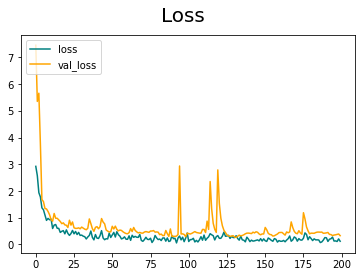

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

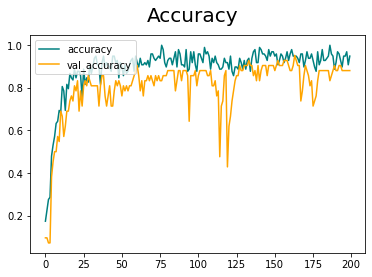

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs_revisited/preprocessed/testing/"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
orig_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", orig_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 6ms/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'S' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Renad'
 'L' 'S' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'S' 'L' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad'
 'Renad' 'L' 'L' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'L' 'L'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad'
 'Renad' 

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs_revisited (copy)/preprocessed/testing/"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
new_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", new_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 6ms/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'S' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Renad'
 'L' 'S' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'S' 'L' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad'
 'L' 'L' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'L' 'L' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad'
 'Renad' 

In [ ]:
count = 0
original_trues = 0
for i in range(len(X_test)):
    if actual_class_names[i] == 'S' and orig_predicted_class_names[i] == 'S':
        original_trues += 1
        if orig_predicted_class_names[i] == new_predicted_class_names[i]:
            # print("Actual:", actual_class_names[i], "Orig:", orig_predicted_class_names[i], "New: ", new_predicted_class_names[i])
            count += 1
print(f"True different device: {count} out of 12")
print(f"True same device: {original_trues} out of 12")

True different device: 1 out of 12
True same device: 11 out of 12


In [ ]:
for i in range(len(predicted_labels)):
    if actual_class_names[i] != new_predicted_class_names[i]:
        print(f'{actual_class_names[i]}:{new_predicted_class_names[i]}', end='  ')
        print(predictions[i].max())
        if i != 0 and i % 10 == 0:
            print()

O:S  0.790173
L:Renad  0.98360664
L:S  0.7705194
Y:A  0.65216804
S:L  0.9732247

S:L  0.7576126
S:L  0.9425985
S:L  0.76094544
S:L  0.96259665
S:L  0.98344976
S:L  0.6113293
S:L  0.8888594
S:L  0.9987214
S:L  0.96387994
S:L  0.9826222
Reem:Renad  0.5782533
Renad:L  0.54583335
Renad:L  0.81554693
Renad:L  0.6600258
Renad:L  0.60156745


In [ ]:
print('true predictions with less certainty')
print(len(predicted_labels))
for i in range(len(predicted_labels)):
    if actual_class_names[i] == new_predicted_class_names[i] and predictions[i].max() <= 0.95:
        print(f'{actual_class_names[i]}:{new_predicted_class_names[i]}', end='  ')
        print(predictions[i].max())
        if i != 0 and i % 10 == 0:
            print()

true predictions with less certainty
99
A:A  0.75518894
A:A  0.61253905
A:A  0.89794046
A:A  0.90146697
A:A  0.36592916
O:O  0.9273096
L:L  0.65450364
L:L  0.7699062

Y:Y  0.88391644
Y:Y  0.64055043
S:S  0.6883967

Reem:Reem  0.62732023
Reem:Reem  0.53083336
Renad:Renad  0.61551136
Renad:Renad  0.65000993
Renad:Renad  0.7942694
Renad:Renad  0.8141134


In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
import os
import pickle
save_model = False
# Save the label encoder
model_dir = os.path.dirname("3-old_mfccs_revisited/normalized/training")
model_name = model_dir.split('/')[-1]
with open(model_dir+'/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
if save_model:
    model.save(model_dir+f'/{model_name}_speaker_identifier.h5')

In [ ]:
# if accuracy > 0.9787234042553191:
#     model.save('speaker identifier.h5')

# Test a sample

In [ ]:
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "6-mfcc_dataset/testing"
X_test, y_test = read_and_preprocess_data(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 1ms/step
Predicted Class Names: ['Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif'
 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A'
 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'S' 'L'
 'L' 'L' 'S' 'L' 'L' 'L' 'L' 'S' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'L' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad']
Actual Class Names: ['Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif'
 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'

In [ ]:
import pyaudio
import sounddevice
import wave
import librosa
import numpy as np
from keras.models import load_model
import pandas as pd


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
WAVE_OUTPUT_FILENAME = "enrollment3.wav"

In [ ]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1
# train_path = ".\dataset\encodings\\s_1.npy"
# test_path = ".\dataset\encodings\\r_1.npy"

record = True

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Started recording...")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)


stream.stop_stream()
stream.close()
p.terminate()

required_frames_size = 96
print(len(frames))
new_frames = frames.copy()
while len(new_frames) < required_frames_size:
    new_frames.extend(frames)
new_frames = new_frames[:required_frames_size]

print(len(new_frames))
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(new_frames))
wf.close()

Started recording...


In [ ]:
file_path = WAVE_OUTPUT_FILENAME
file_name = file_path.split('.')[0]
output_path = "./sample tests/temp/"
signal, sr = librosa.load(file_path, duration=5)
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=22, sr=sr)
test_sample = [mfccs]
test_sample = np.array(test_sample)
test_sample.shape

(1, 22, 216)

In [ ]:
# model = load_model('speaker identifier.h5')
# Load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
from sklearn.metrics import accuracy_score

# Get the predictions of the model on the testing data
predictions = model.predict(test_sample)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)
print(label_encoder.classes_)
print(f"max prob: {predictions.max()} as {label_encoder.classes_[np.argmax(predictions)]}")
print(f"second max prob: {np.sort(predictions)[0][-2]} as {label_encoder.classes_[np.argsort(predictions)[0][-2]]}")
print(f"third max prob: {np.sort(predictions)[0][-3]} as {label_encoder.classes_[np.argsort(predictions)[0][-3]]}")

1/1 [==============================] - 0s 52ms/step
Predicted Class Names: ['L']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 0.9712963700294495 as L
second max prob: 0.020499570295214653 as Renad
third max prob: 0.004142431076616049 as S


In [ ]:
stop here

1/1 [==============================] - 0s 11ms/step
Predicted Class Names: ['Sherif']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 1.0 as Sherif
second max prob: 5.361565792033618e-12 as S
third max prob: 8.982738665852703e-15 as Y

SyntaxError: invalid decimal literal (2536742902.py, line 3)

In [ ]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1
# train_path = ".\dataset\encodings\\s_1.npy"
# test_path = ".\dataset\encodings\\r_1.npy"

record = True

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Started recording...")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)


stream.stop_stream()
stream.close()
p.terminate()

required_frames_size = 96
print(len(frames))
new_frames = frames.copy()
while len(new_frames) < required_frames_size:
    new_frames.extend(frames)
new_frames = new_frames[:required_frames_size]

print(len(new_frames))
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(new_frames))
wf.close()


file_path = WAVE_OUTPUT_FILENAME
signal, sr = librosa.load(file_path, duration=5)
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=22, sr=sr)
test_sample = [mfccs]
test_sample = np.array(test_sample)
print(test_sample.shape)
# Get the predictions of the model on the testing data
predictions = model.predict(test_sample)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)
print(label_encoder.classes_)
print(f"max prob: {predictions.max()} as {label_encoder.classes_[np.argmax(predictions)]}")
print(f"second max prob: {np.sort(predictions)[0][-2]} as {label_encoder.classes_[np.argsort(predictions)[0][-2]]}")
print(f"third max prob: {np.sort(predictions)[0][-3]} as {label_encoder.classes_[np.argsort(predictions)[0][-3]]}")

Started recording...
15
96
(1, 22, 216)
1/1 [==============================] - 0s 13ms/step
Predicted Class Names: ['Sherif']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 0.9982902407646179 as Sherif
second max prob: 0.0012117248261347413 as L
third max prob: 0.00030369008891284466 as S
